In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

### puzzle 1 ###

In [2]:
test_data = """pbga (66)
xhth (57)
ebii (61)
havc (66)
ktlj (57)
fwft (72) -> ktlj, cntj, xhth
qoyq (66)
padx (45) -> pbga, havc, qoyq
tknk (41) -> ugml, padx, fwft
jptl (61)
ugml (68) -> gyxo, ebii, jptl
gyxo (61)
cntj (57)""".split('\n')
puzzle_data = open('day7_input').readlines()

Parse the data to create a set of nodes w/ the weight of each node (a dictionary called "weights"). If the node points to other nodes, then add each directed connection as a tuple to a list of connections (called "connections").

In [3]:
def parse_nodes_and_connections(lines):
    connections = []
    weights = {}
    for line in lines:
        items = line.split()
        node = items[0]
        weight = int(items[1][1:-1])
        weights[node] = weight
        if '->' in line:
            rhs = line.split('>')
            connected_nodes = [cn.strip() for cn in rhs[1].split(',')]
            for cn in connected_nodes:
                connections.append((node, cn))
    return weights, connections

In [4]:
test_weights, test_connections = parse_nodes_and_connections(test_data)

In [5]:
test_weights

{'cntj': 57,
 'ebii': 61,
 'fwft': 72,
 'gyxo': 61,
 'havc': 66,
 'jptl': 61,
 'ktlj': 57,
 'padx': 45,
 'pbga': 66,
 'qoyq': 66,
 'tknk': 41,
 'ugml': 68,
 'xhth': 57}

In [6]:
test_connections 

[('fwft', 'ktlj'),
 ('fwft', 'cntj'),
 ('fwft', 'xhth'),
 ('padx', 'pbga'),
 ('padx', 'havc'),
 ('padx', 'qoyq'),
 ('tknk', 'ugml'),
 ('tknk', 'padx'),
 ('tknk', 'fwft'),
 ('ugml', 'gyxo'),
 ('ugml', 'ebii'),
 ('ugml', 'jptl')]

In [7]:
G = nx.DiGraph(test_connections)

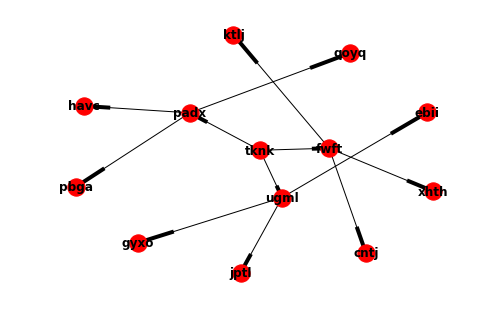

In [8]:
nx.draw(G, with_labels=True, font_weight='bold')

Any node on the RHS of a connection cannot be at the bottom of the tower. So, it's easy to find the nodes at the bottom using set subtraction:

In [9]:
not_bottom = set([connection[1] for connection in test_connections])
bottom = set(test_weights.keys()) - not_bottom

In [10]:
assert({'tknk'} == bottom)

In [11]:
bottom

{'tknk'}

In [12]:
weights, connections = parse_nodes_and_connections(puzzle_data)

In [13]:
not_bottom = set([connection[1] for connection in connections])
bottom = set(weights.keys()) - not_bottom
bottom

{'airlri'}

### puzzle 2 ###

In [14]:
def connection_dict(connections):
    cd = {}
    for s,t in connections:
        if s not in cd:
            cd[s] = [t]
        else:
            cd[s].append(t)
    return cd    

In [15]:
test_cd = connection_dict(test_connections)
test_cd

{'fwft': ['ktlj', 'cntj', 'xhth'],
 'padx': ['pbga', 'havc', 'qoyq'],
 'tknk': ['ugml', 'padx', 'fwft'],
 'ugml': ['gyxo', 'ebii', 'jptl']}

In [16]:
def tower_weight(base, conn_dict, weights):
    weight = weights[base]
    if base not in conn_dict:
        return weight
    for node in conn_dict[base]:
        weight += tower_weight(node, conn_dict, weights)
    return weight

In [17]:
assert(61 == tower_weight('gyxo', test_cd, test_weights))

In [18]:
assert(251 == tower_weight('ugml', test_cd, test_weights))

In [19]:
cd = connection_dict(connections)

In [20]:
[(node, tower_weight(node, cd, weights)) for node in cd['airlri']]

[('pidgnp', 152523),
 ('lljifba', 152514),
 ('gmewl', 152514),
 ('tbedct', 152514),
 ('ryvidhy', 152514),
 ('rdytzgp', 152514)]

In [21]:
imbalance = tower_weight('pidgnp', cd, weights) - tower_weight('lljifba', cd, weights)
imbalance

9

In [22]:
def find_problem_node(base, cd, weights):
    nodes = [node for node in cd[base]]
    wts = [tower_weight(node, cd, weights) for node in nodes]
    if len(set(wts)) == 1:
        # all weights are the same, meaning this base is the problem node
        return base
    freqs = {}
    for wt in wts:
        if wt not in freqs:
            freqs[wt] = 1
        else:
            freqs[wt] += 1
    for wt in freqs:
        if freqs[wt] == 1: 
            break
    next_node = nodes[wts.index(wt)]
    return find_problem_node(next_node, cd, weights)

In [23]:
find_problem_node('airlri', cd, weights)

'dqwocyn'

In [24]:
print(weights['dqwocyn'] - imbalance)

1206
